In [5]:
import os

import nibabel as nib
import numpy as np
from nilearn.plotting import plot_roi

from nimare.dataset import Dataset
from nimare.decode import discrete
from nimare.utils import get_resource_path

In [6]:
dset = Dataset(os.path.join(get_resource_path(), "neurosynth_laird_studies.json"))
dset.annotations.head(5)

,id,study_id,contrast_id,Neurosynth_TFIDF__001,Neurosynth_TFIDF__01,Neurosynth_TFIDF__05,Neurosynth_TFIDF__10,Neurosynth_TFIDF__100,Neurosynth_TFIDF__11,Neurosynth_TFIDF__12,...,Neurosynth_TFIDF__yield,Neurosynth_TFIDF__yielded,Neurosynth_TFIDF__young,Neurosynth_TFIDF__young adults,Neurosynth_TFIDF__young healthy,Neurosynth_TFIDF__young older,Neurosynth_TFIDF__younger,Neurosynth_TFIDF__younger adults,Neurosynth_TFIDF__youth,Neurosynth_TFIDF__zone
0,17029760-1,17029760,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18760263-1,18760263,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19162389-1,19162389,1,0.0,0.0,0.0,0.0,0.0,0.176321,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19603407-1,19603407,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20197097-1,20197097,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


INFO:nimare.decode.base:Retaining 728/3228 features.


,r
feature,
Neurosynth_TFIDF__presence,0.852701
Neurosynth_TFIDF__primary,0.848964
Neurosynth_TFIDF__motor,0.746275
Neurosynth_TFIDF__inferior frontal,0.621745
Neurosynth_TFIDF__communication,0.621745


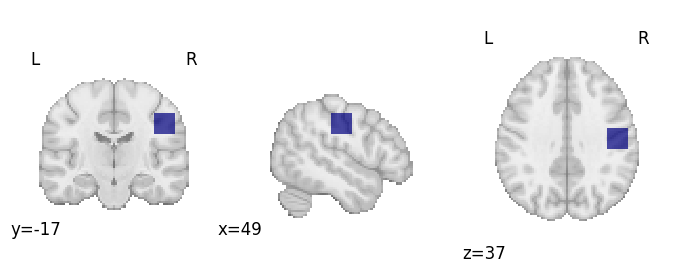

In [12]:
arr = np.zeros(dset.masker.mask_img.shape, np.int32)
arr[65:75, 50:60, 50:60] = 1
mask_img = nib.Nifti1Image(arr, dset.masker.mask_img.affine)
plot_roi(mask_img, draw_cross=False)

decoder = discrete.ROIAssociationDecoder(mask_img)
decoder.fit(dset)

# The `transform` method doesn't take any parameters.
decoded_df = decoder.transform()

decoded_df.sort_values(by="r", ascending=False).head()

In [10]:
print(decoded_df)

                                  pForward  zForward  likelihoodForward  \
Term                                                                      
Neurosynth_TFIDF__10                   1.0      -0.0           0.000000   
Neurosynth_TFIDF__11                   1.0       0.0           5.757732   
Neurosynth_TFIDF__17                   1.0      -0.0           0.000000   
Neurosynth_TFIDF__aberrant             1.0      -0.0           0.000000   
Neurosynth_TFIDF__abilities            1.0      -0.0           0.000000   
...                                    ...       ...                ...   
Neurosynth_TFIDF__voxels               1.0      -0.0           0.000000   
Neurosynth_TFIDF__way                  1.0      -0.0           0.000000   
Neurosynth_TFIDF__widespread           1.0      -0.0           0.000000   
Neurosynth_TFIDF__working              1.0      -0.0           0.000000   
Neurosynth_TFIDF__working memory       1.0      -0.0           0.000000   

                        

In [28]:
from src.routers.features import schemas
from nimare import utils as nimare_utils
from nilearn import datasets as nilearn_datasets
from numpy import linalg
def millimeter_to_voxel(coordinates: schemas.InputCoordinates) -> tuple[int]:
    """Convert millimeter coordinates to voxel coordinates.

    Args:
        coordinates: The millimeter coordinates.

    Returns:
        The voxel coordinates.
    """
    sample_image = nilearn_datasets.load_mni152_template()
    affine = sample_image.get_qform()
    return nib.affines.apply_affine(
        linalg.inv(affine), [coordinates.x, coordinates.y, coordinates.z]
    )


In [29]:
millimeter_to_voxel(schemas.InputCoordinates(x=1, y=2, z=3))

NameError: name 'linalg' is not defined

In [21]:
sample_image = nilearn_datasets.load_mni152_template()

array([[   1.,    0.,    0.,  -98.],
       [   0.,    1.,    0., -134.],
       [   0.,    0.,    1.,  -72.],
       [   0.,    0.,    0.,    1.]])